In [31]:
import requests
import json
import pandas as pd
import numpy as np
from typing import List, Dict
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

In [32]:
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")
pcd_dataset.info()

# pcd_dataset = pd.read_csv("../data/all_systems.csv")
# pcd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   System                              1179 non-null   object 
 1   Domain                              1179 non-null   object 
 2   Organization                        1030 non-null   object 
 3   Authors                             1067 non-null   object 
 4   Publication date                    1179 non-null   object 
 5   Reference                           1134 non-null   object 
 6   Link                                1177 non-null   object 
 7   Citations                           1029 non-null   float64
 8   Notability criteria                 770 non-null    object 
 9   Notability criteria notes           458 non-null    object 
 10  Compute sponsor categorization      570 non-null    object 
 11  Authors by country                  629 non

In [33]:
len(pcd_dataset)

1179

In [5]:
pcd_dataset.columns

Index(['System', 'Domain', 'Organization', 'Authors', 'Publication date',
       'Reference', 'Link', 'Citations', 'Notability criteria',
       'Notability criteria notes', 'Compute sponsor categorization',
       'Authors by country', 'Last modified', 'Created By',
       'Organization categorization', 'Country (from Organization)', 'Task',
       'Parameters', 'Parameters notes', 'Confidence', 'Open-source',
       'Base model', 'Benchmark data', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes',
       'Inference compute notes', 'Approach',
       'Training compute cost (2020 USD)', 'Abstract', 'Exclude',
       'Archived links', 'Training hardware', 'Training cost trends', 'Epochs',
       'Inference compute (FLOP)', 'Foundation model', 'Training time (hours)',
       'Training time notes', 'Finetune compute notes', 'Batch size',
       'Hardware quantity', 'Ha

In [6]:
pcd_dataset.Domain.value_counts()

Domain
Language                            591
Vision                              190
Biology                              58
Games                                50
Multimodal                           48
Other                                39
Speech                               36
Image generation                     31
Recommendation                       25
Robotics                             22
Video                                16
Vision,Image generation              12
Audio                                10
3D modeling                           7
Mathematics                           6
Driving                               5
Vision,Language                       4
Medicine                              3
Image generation,Vision               3
Earth science                         3
Multimodal,Vision,Language            2
Language,Biology                      2
Multimodal,Language,Vision            2
Language,Vision                       2
Biology,Language                 

In [7]:
pcd_dataset.Citations.describe()

count      1029.000000
mean       3592.651118
std       11569.604966
min           0.000000
25%          42.000000
50%         343.000000
75%        2524.000000
max      152462.000000
Name: Citations, dtype: float64

In [8]:
# Most cited papers

pcd_dataset.sort_values(by="Citations", ascending=False).head(5)

,System,Domain,Organization,Authors,Publication date,Reference,Link,Citations,Notability criteria,Notability criteria notes,...,Training time notes,Finetune compute notes,Batch size,Hardware quantity,Hardware utilization,Compute cost notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training data center
17,ResNet-110 (CIFAR-10),Vision,Microsoft,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,152462.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,ResNet-152 (ImageNet),Vision,Microsoft,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,152462.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,ADAM (CIFAR-10),Vision,"University of Amsterdam,OpenAI,University of T...","DP Kingma, J Ba",2014-12-22,Adam: A Method for Stochastic Optimization,https://arxiv.org/abs/1412.6980,130138.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,AlexNet,Vision,University of Toronto,"Alex Krizhevsky, Ilya Sutskever, Geoffrey Hinton",2012-09-30,ImageNet Classification with Deep Convolutiona...,https://proceedings.neurips.cc/paper/2012/hash...,105754.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,VGG19,Vision,University of Oxford,"K Simonyan, A Zisserman",2014-09-04,Very Deep Convolutional Networks for Large-Sca...,https://arxiv.org/abs/1409.1556,85858.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pcd_dataset["Organization"].value_counts().head(10)

Organization
Google                                         62
OpenAI                                         31
DeepMind                                       30
Meta AI                                        27
Stanford University                            24
Google Brain                                   20
Google DeepMind                                20
Microsoft                                      19
University of Toronto                          16
Massachusetts Institute of Technology (MIT)    15
Name: count, dtype: int64

In [10]:
pcd_dataset["Publication date"] = pd.to_datetime(pcd_dataset["Publication date"])
pcd_dataset["Publication date"].describe()

count                             1179
mean     2016-11-10 07:34:21.068702464
min                1950-07-02 00:00:00
25%                2016-09-17 00:00:00
50%                2020-05-06 00:00:00
75%                2022-10-04 00:00:00
max                2029-09-13 00:00:00
Name: Publication date, dtype: object

In [11]:
# Identify the largest model

pcd_dataset[pcd_dataset["Parameters"]==pcd_dataset["Parameters"].max()]

,System,Domain,Organization,Authors,Publication date,Reference,Link,Citations,Notability criteria,Notability criteria notes,...,Training time notes,Finetune compute notes,Batch size,Hardware quantity,Hardware utilization,Compute cost notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training data center
953,BaGuaLu,Multimodal,"Tsinghua University,Zhejiang Lab,Beijing Acade...","Zixuan Ma, Jiaao He, Jiezhong Qiu, Huanqi Cao,...",2022-03-28,BaGuaLu: Targeting Brain Scale Pretrained Mode...,https://dl.acm.org/doi/abs/10.1145/3503221.350...,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Citation sum per level of open-source status

pcd_dataset.groupby("Open-source")["Citations"].sum().sort_values(ascending=False)

Open-source
Fully open-source     105714.0
API accessible         23281.0
Permissive license     17677.0
Unreleased              2908.0
Weights available       2009.0
Name: Citations, dtype: float64

In [13]:
pcd_dataset["Citations"].sum()

3696838.0

In [14]:
pcd_dataset["Open-source"].unique()

array([nan, 'Permissive license', 'Fully open-source', 'API accessible',
       'Unreleased', 'Weights available'], dtype=object)

# Conclusions

We look into 1143 foundation models. The model types include Language, Vision, Biology, Games, Multimodal, Robotics and others. Majority of the models are language models (50%), with vision models being the second most common (16%). The models included were published from 1950 to 2024, though majority include models published from 2016 onwards. Most of the models are documented as academic papers or reports, and they recived an average of 358 citations. Most cited model papers are vision and language models. The number of parameters for the smallest models is 10 or more, while for the largest model is over 170 trilion parameters. 

The sample includes methodology papers, such as for example a method for stochastic optimization Adam, long short-term memory networks and transofrmers.

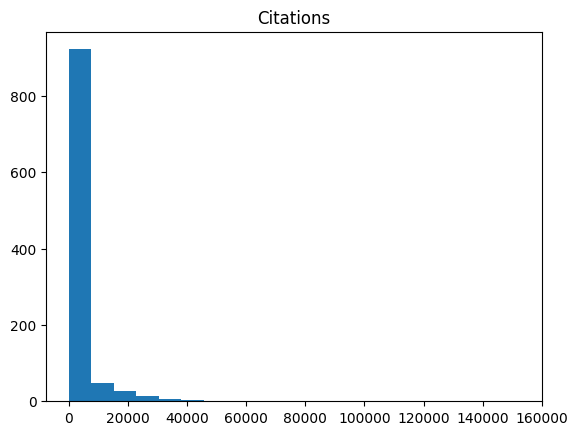

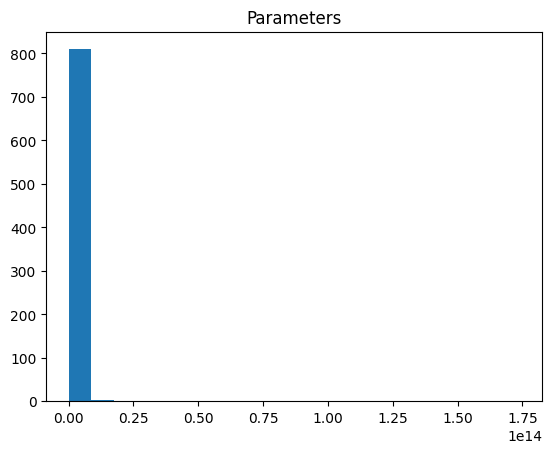

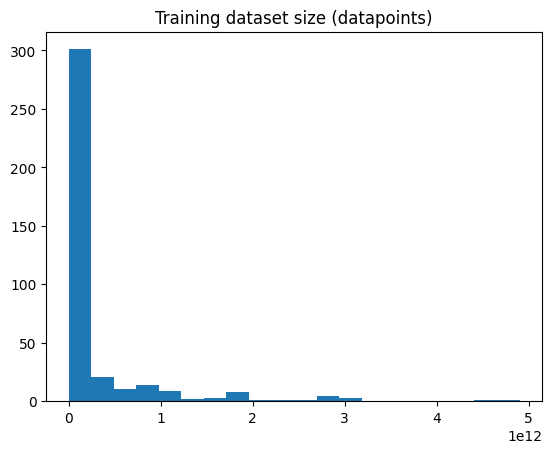

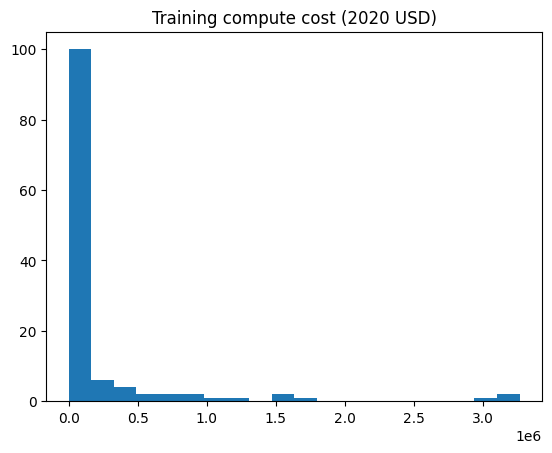

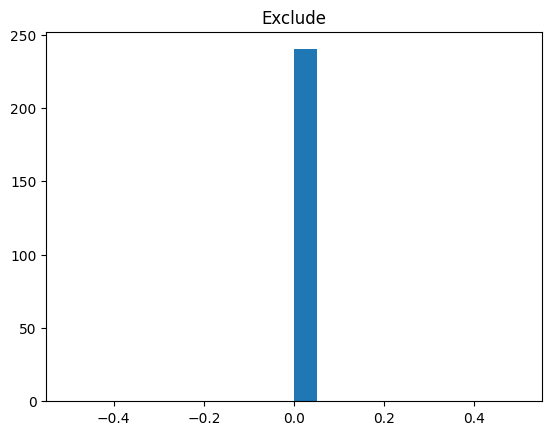

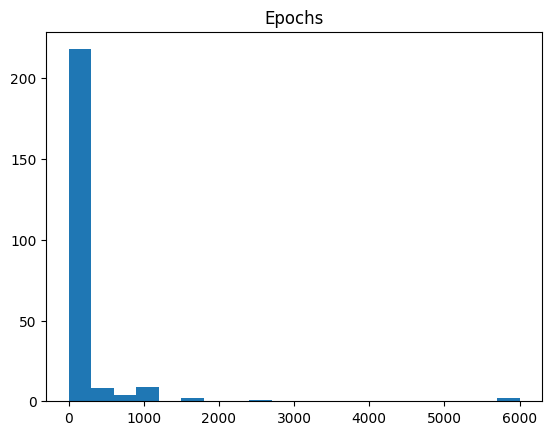

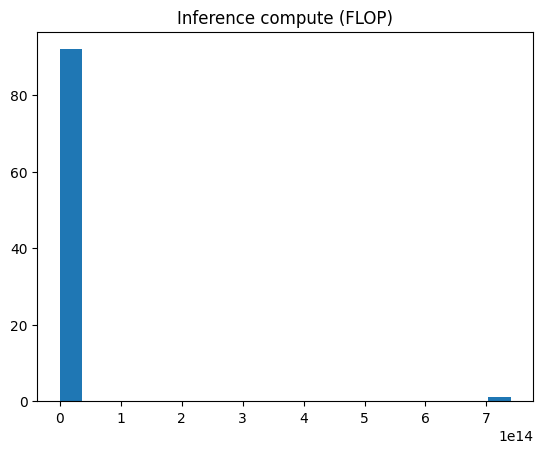

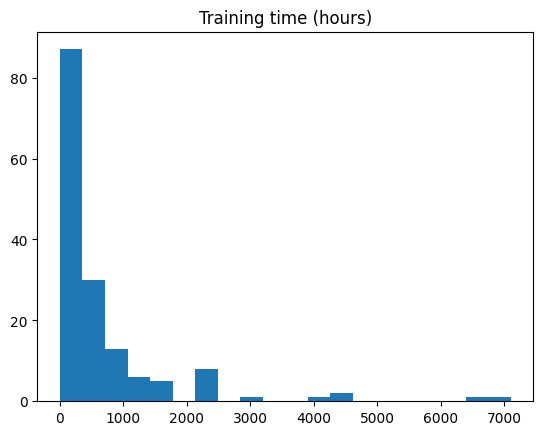

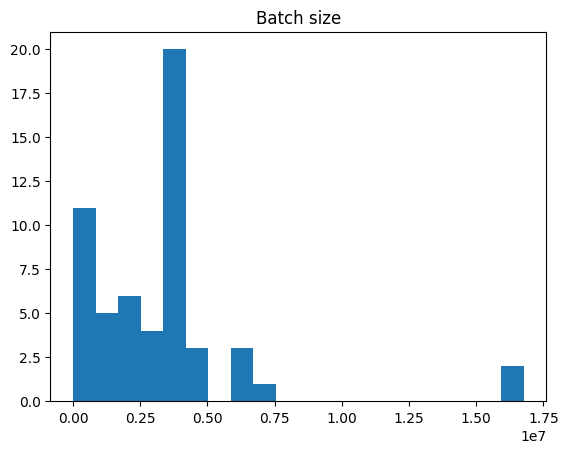

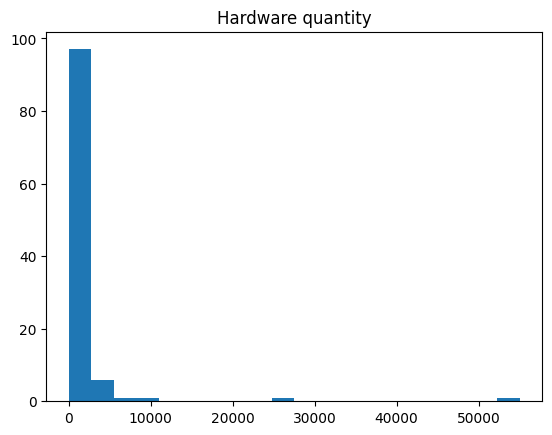

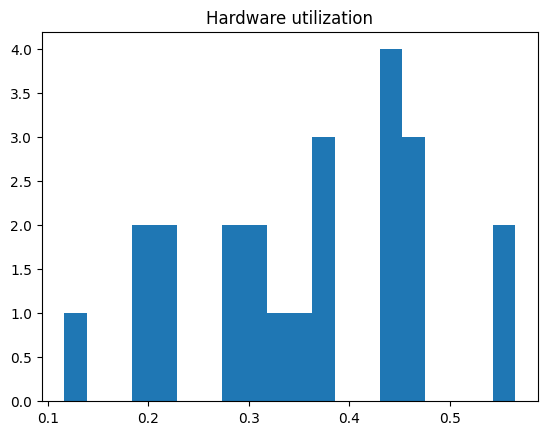

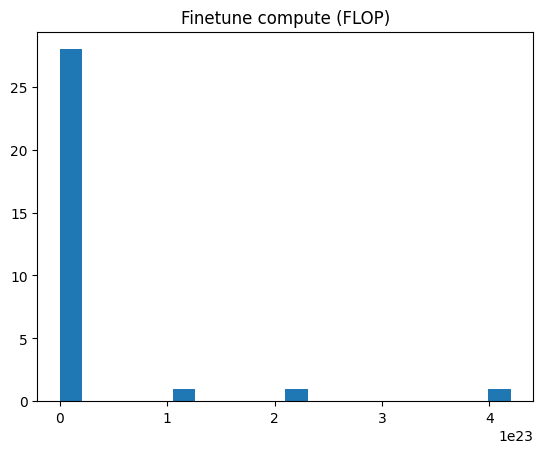

In [15]:
# distributions of integer columns

for column in pcd_dataset.select_dtypes(include=[np.number]).columns:
    plt.hist(pcd_dataset[column], bins=20)
    plt.title(column)
    plt.show()

In [16]:
orgs = pcd_dataset[['Organization categorization']].dropna()

orgs['unique_items'] = orgs['Organization categorization'].apply(lambda x: list(set(x.split(','))))
orgs.head()

,Organization categorization,unique_items
0,Academia,[Academia]
1,Industry,[Industry]
2,"Academia,Academia",[Academia]
3,"Academia,Academia,Academia,Academia",[Academia]
4,Academia,[Academia]


In [17]:
orgs['unique_items'].value_counts()

unique_items
[Industry]                                               474
[Academia]                                               345
[Industry, Academia]                                     189
[Research collective]                                      8
[Government]                                               3
[Industry, Government, Academia]                           2
[Industry, Research collective, Academia]                  2
[Industry, Research collective]                            2
[Government, Academia]                                     1
[Industry, Government, Research collective, Academia]      1
Name: count, dtype: int64

In [18]:
pcd_dataset['Open-source'].value_counts()

Open-source
Permissive license    100
Fully open-source      73
API accessible         26
Weights available      24
Unreleased             16
Name: count, dtype: int64

In [19]:
# count the number of missing for each column
pcd_dataset.isnull().sum()

System                                   0
Domain                                   0
Organization                           149
Authors                                112
Publication date                         0
Reference                               45
Link                                     2
Citations                              150
Notability criteria                    409
Notability criteria notes              721
Compute sponsor categorization         609
Authors by country                     550
Last modified                            0
Created By                               0
Organization categorization            152
Country (from Organization)            154
Task                                   457
Parameters                             365
Parameters notes                       592
Confidence                             707
Open-source                            940
Base model                            1109
Benchmark data                         941
Training co

# Download Model Paper and Reports

In [20]:
pcd_dataset["Link"].head()

0            https://pubmed.ncbi.nlm.nih.gov/19000969/
1    https://huggingface.co/karakuri-ai/karakuri-lm...
2                      https://arxiv.org/abs/1312.6026
3                     https://arxiv.org/abs/1911.06136
4           https://www.aclweb.org/anthology/D12-1110/
Name: Link, dtype: object

In [52]:
import requests
from PyPDF2 import PdfReader
import requests
import os

def download_pdf(url, filename):
    # Check if the file already exists
    if os.path.exists(filename):
        print(f"File {filename} already exists. Skipping download.")
        return True 
    
    # Proceed with the download if the file does not exist
    
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f"Downloaded {filename} successfully.")
            return True
        else:
            print(f"Failed to download {filename}. HTTP status code: {response.status_code}")
            return False
    except Exception as e:
        print(f"An error occurred while downloading {filename}. {e}")
        return False

def is_pdf_valid(filename):
    try:
        reader = PdfReader(filename)
        if len(reader.pages) > 0:
            return True
    except:
        return False
    return False

# iterate through the links and download the pdfs

# new time series
results = []

for i, (name, link) in enumerate(zip(pcd_dataset["System"], pcd_dataset["Link"])):
    # if i <20:
        # Correct the string manipulation for filename
        # Use single quotes inside the f-string to avoid syntax error
        filename = f"../data/papers/{i}_{name.lower().replace('/','_').replace(' ', '_')}.pdf"

        # check if link is str
        if not isinstance(link, str):
            print(f"Link for {name} is not a string.")
            results.append("Error")
            continue

        if link.endswith(".pdf"):
            pdf_url = link
        elif "arxiv.org" in link:
            link = link.replace("abs", "pdf")
            pdf_url = link + ".pdf"
        else:
            results.append("Error")
            continue
        
        # Download the PDF
        if download_pdf(pdf_url, filename):
            print("PDF downloaded successfully.")
            # Check if the PDF is valid
            if is_pdf_valid(filename):
                print("The PDF is valid.")
                results.append("OK")
            else:
                print("The PDF is not valid or corrupted.")
                results.append("Error")
        else:
            print("Failed to download the PDF.")
            results.append("Error")


File ../data/papers/2_dot(s)-rnn.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/3_kepler.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/8_vd-lstm+real_large.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/12_deeply-recursive_convnet.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/13_gcnn-14.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/14_contextnet.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/17_resnet-110_(cifar-10).pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is valid.
File ../data/papers/19_alexnet_+_coordinating_filters.pdf already exists. Skipping download.
PDF downloaded successfully.
The PDF is vali

In [53]:
# add result column to the dataframe

pcd_dataset["PDF download"] = results

In [54]:
pcd_dataset.head()

,System,Domain,Organization,Authors,Publication date,Reference,Link,Citations,Notability criteria,Notability criteria notes,...,Batch size,Hardware quantity,Hardware utilization,Compute cost notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training data center,PDF download,PDF filename
0,Sparse digit recognition SVM,Vision,University of Lubeck,"Kai Labusch, Erhadt Barth, Thomas Martinetz",2008-11-19,Simple method for high-performance digit recog...,https://pubmed.ncbi.nlm.nih.gov/19000969/,124.0,SOTA improvement,"""Finally, we train a support vector machine (S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error,../data/papers/0_sparse_digit_recognition_svm.pdf
1,Karakuri LM,Language,KARAKURI Inc.,NaN,2024-01-26,KARAKURI LM,https://huggingface.co/karakuri-ai/karakuri-lm...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error,../data/papers/1_karakuri_lm.pdf
2,DOT(S)-RNN,Language,"Université de Montréal,Aalto University","Razvan Pascanu, Caglar Gulcehre, Kyunghyun Cho...",2013-12-20,How to Construct Deep Recurrent Neural Networks,https://arxiv.org/abs/1312.6026,1255.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK,../data/papers/2_dot(s)-rnn.pdf
3,KEPLER,Language,"Tsinghua University,Mila- Quebec AI,University...","Xiaozhi Wang, Tianyu Gao, Zhaocheng Zhu, Zhiyu...",2020-11-23,KEPLER: A Unified Model for Knowledge Embeddin...,https://arxiv.org/abs/1911.06136,420.0,SOTA improvement,"""Experimental results show that KEPLER achieve...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK,../data/papers/3_kepler.pdf
4,MV-RNN,Language,Stanford University,"R. Socher, B. Huval, C. D. Manning, and A. Y. Ng",2012-07-12,Semantic Compositionality through Recursive Ma...,https://www.aclweb.org/anthology/D12-1110/,1459.0,Highly cited,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error,../data/papers/4_mv-rnn.pdf


In [55]:
# add file name column to dataframe

pcd_dataset["PDF filename"] = [f"../data/papers/{i}_{name.lower().replace('/','_').replace(' ', '_')}.pdf" for i, name in enumerate(pcd_dataset["System"])]

# save the dataframe to a csv file

pcd_dataset.to_csv("../data/all_systems_with_pdf.csv", index=False)